In [1]:
from datetime import datetime
from getpass import getpass

admin_rdm_url = 'https://admin.bh.rdm.yzwlab.com/' #'https://admin.staging.rdm.example.com/'
rdm_url = 'https://bh.rdm.yzwlab.com/'

idp_name_1 = None # 'GakuNin RDM IdP'
idp_username_1 = None
idp_password_1 = None
default_result_path = None
close_on_fail = False
transition_timeout = 30000

target_organization = 'Washington University in St. Louis [Test]'
quota_user_id = 'jbgaz'
yyyymmdd = datetime.now().strftime('%Y%m%d')
quota_project_name = f'管理者クォータテスト {yyyymmdd}'

In [2]:
if idp_username_1 is None:
    idp_username_1 = input(prompt=f'Username for {idp_name_1}')
if idp_password_1 is None:
    idp_password_1 = getpass(prompt=f'Password for {idp_username_1}@{idp_name_1}')
(len(idp_username_1), len(idp_password_1))

# 定期監視-管理者-NIIストレージのクォータ

- サブシステム名: 管理者
- ページ/アドオン: 管理者
- 機能分類: ログイン
- シナリオ名: ログイン確認
- 用意するテストデータ: URL一覧、アカウント(管理者ユーザー1: GRDM)


## GakuNin RDM管理者ページのURLを開く

①ブラウザを開き、画面右上の設定メニューから「シークレットモードで開く」を選択する。  
②新規画面が開かれ、画面上において、「シークレットモードです」と表示されていることを確認する。
以下、シークレットモードにて確認を行う。

③ブラウザを開き、下記URLにアクセスする。  
https://rdm.example.com/  

In [3]:
import tempfile

work_dir = tempfile.mkdtemp()
if default_result_path is None:
    default_result_path = work_dir
work_dir

'/tmp/tmpkfs27sdm'

In [17]:
import importlib
import pandas as pd

import scripts.playwright
importlib.reload(scripts.playwright)

from scripts.playwright import *
from scripts import grdm

await init_pw_context(close_on_fail=close_on_fail, last_path=default_result_path)

('20250421-053820', '/tmp/tmpcn41or_7')

Start epoch: 1745213900.9710293 seconds


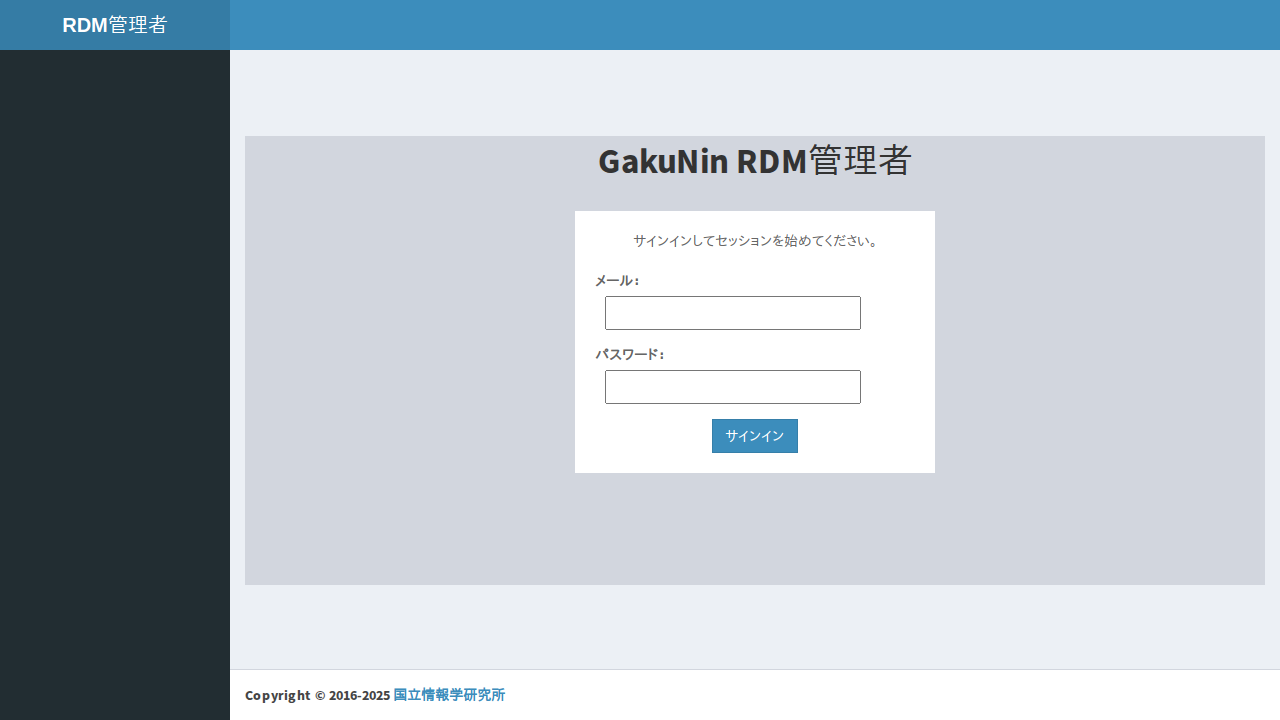

In [18]:
import time

async def _step(page):
    await page.goto(admin_rdm_url)

    await expect(page.locator('.login-logo')).to_be_visible(timeout=30000)

await run_pw(_step)

## ログイン情報を用いてGakuNin RDMにログインする

(IdPに関するログイン情報が与えられた場合、)
GakuNin Embeded DSのプルダウンを展開し、IdPリストから指定されたIdPを選択する。その後、アカウントのID/Passwordを入力して「Login」ボタンを押下する。

(IdPが指定されていない場合、)
CASのログイン操作を実施する。

Start epoch: 1745213903.3701804 seconds


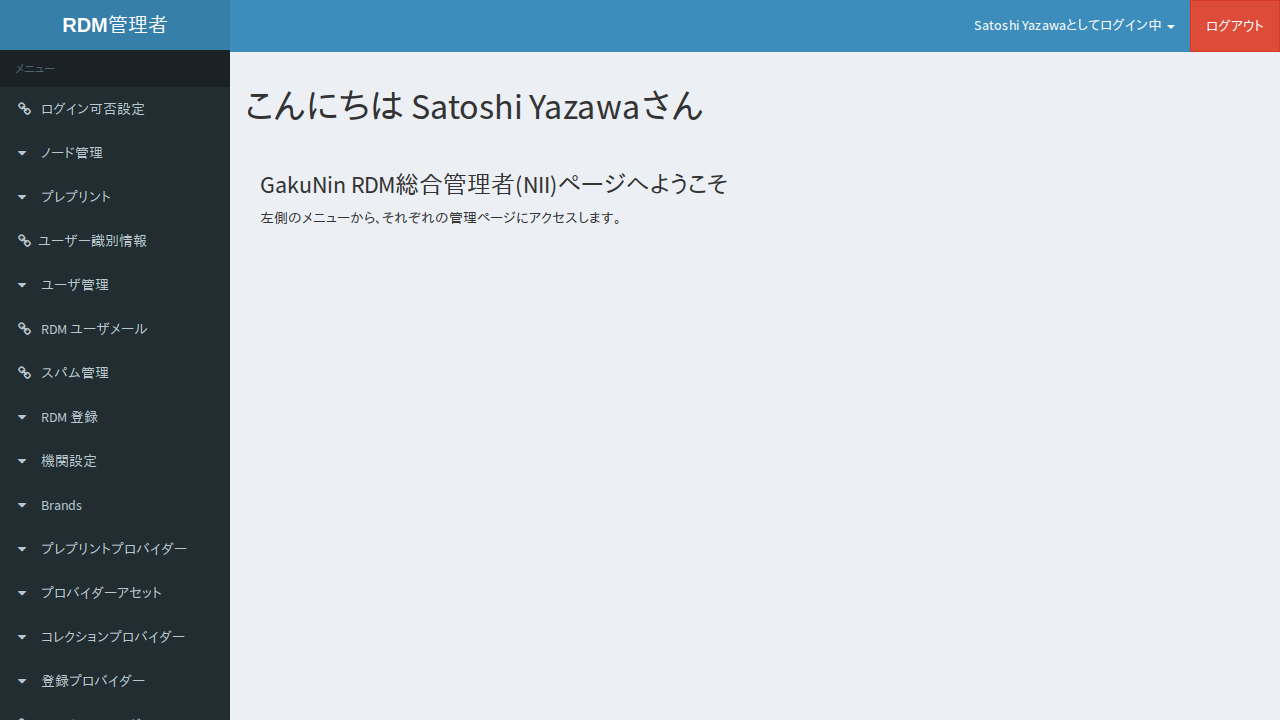

In [19]:
import scripts.grdm
importlib.reload(scripts.grdm)

async def _step(page):
    await scripts.grdm.login_as_admin(
        page, idp_name_1, idp_username_1, idp_password_1, transition_timeout=transition_timeout
    )

    await expect(page.locator('//*[contains(@class, "btn-danger") and contains(text(), "ログアウト")]')).to_be_enabled(timeout=transition_timeout)

await run_pw(_step)

## 「NIIストレージのクォータ」を選択する

「NIIストレージ使用の機関のリスト」が表示される

Start epoch: 1745213904.3914475 seconds


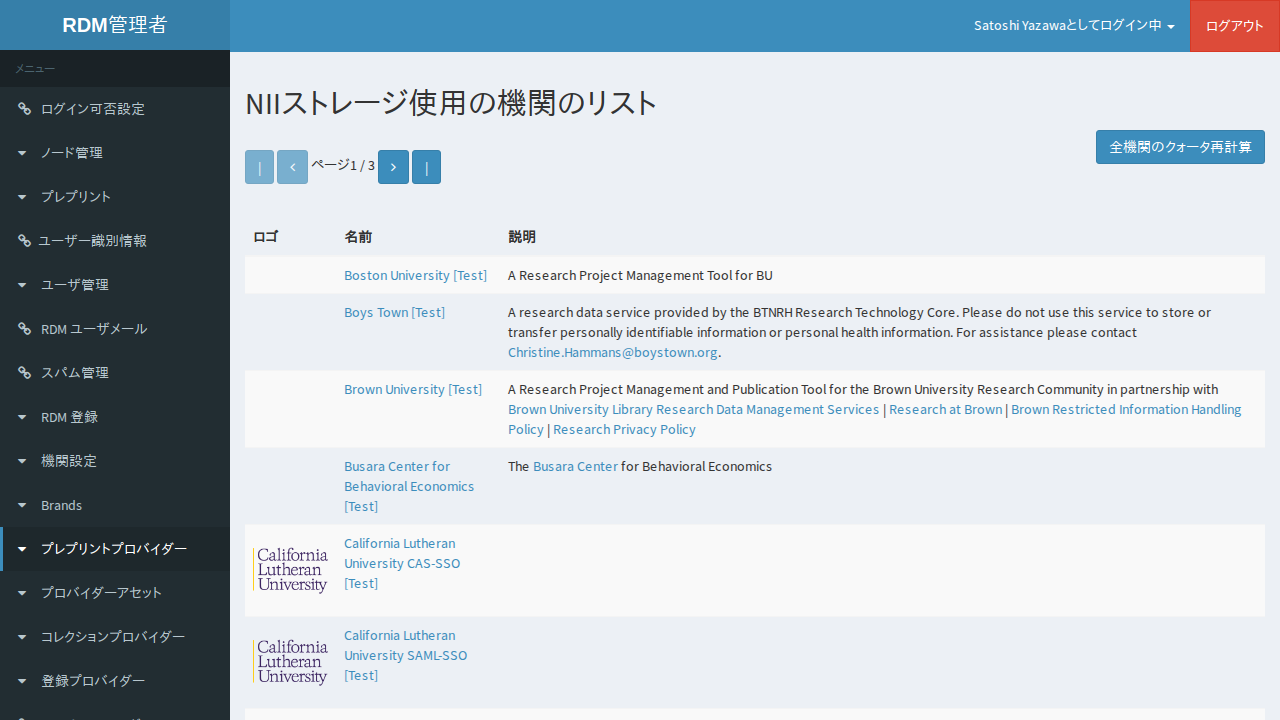

In [20]:
async def _step(page):
    await page.locator('//a[@href = "/institutions/institution_list/"]').click()

    await expect(page.locator('//h2[text() = "NIIストレージ使用の機関のリスト"]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## 「機関のリスト」画面の名前から「GakuNin RDM IdP」を選択する

「GakuNin RDM IdP」の詳細が表示される

Start epoch: 1745213905.2460957 seconds


Traceback (most recent call last):
  File "/tmp/ipykernel_68/2721149869.py", line 7, in _step
    await expect(link).to_be_visible()
  File "/opt/conda/lib/python3.12/site-packages/playwright/async_api/_generated.py", line 20085, in to_be_visible
    await self._impl_obj.to_be_visible(visible=visible, timeout=timeout)
  File "/opt/conda/lib/python3.12/site-packages/playwright/_impl/_assertions.py", line 677, in to_be_visible
    await self._expect_impl(
  File "/opt/conda/lib/python3.12/site-packages/playwright/_impl/_assertions.py", line 74, in _expect_impl
    raise AssertionError(
AssertionError: Locator expected to be visible
Actual value: <element(s) not found> 
Call log:
  - LocatorAssertions.to_be_visible with timeout 5000ms
  -   - waiting for locator("//a[text() = \"Washington University in St. Louis [Test]\"]")



Search next page...


Traceback (most recent call last):
  File "/tmp/ipykernel_68/2721149869.py", line 7, in _step
    await expect(link).to_be_visible()
  File "/opt/conda/lib/python3.12/site-packages/playwright/async_api/_generated.py", line 20085, in to_be_visible
    await self._impl_obj.to_be_visible(visible=visible, timeout=timeout)
  File "/opt/conda/lib/python3.12/site-packages/playwright/_impl/_assertions.py", line 677, in to_be_visible
    await self._expect_impl(
  File "/opt/conda/lib/python3.12/site-packages/playwright/_impl/_assertions.py", line 74, in _expect_impl
    raise AssertionError(
AssertionError: Locator expected to be visible
Actual value: <element(s) not found> 
Call log:
  - LocatorAssertions.to_be_visible with timeout 5000ms
  -   - waiting for locator("//a[text() = \"Washington University in St. Louis [Test]\"]")



Search next page...


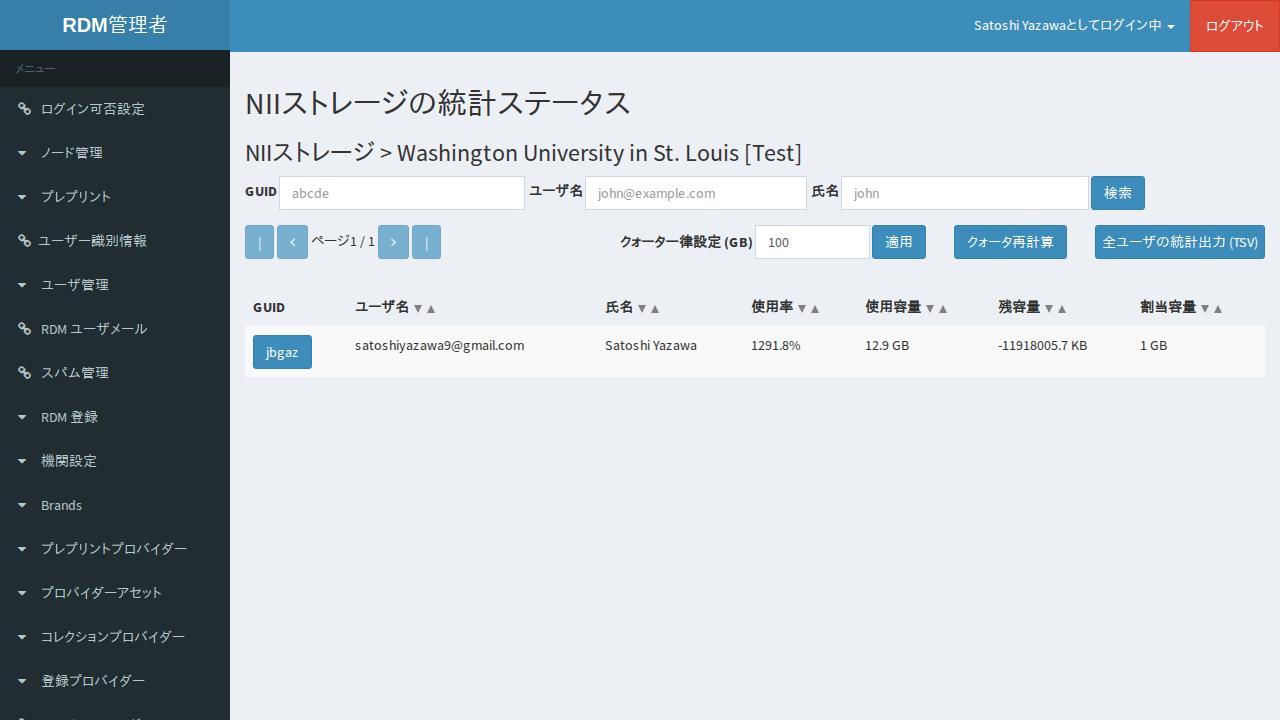

In [21]:
import traceback

async def _step(page):
    while True:
        link = page.locator(f'//a[text() = "{target_organization}"]')
        try:
            await expect(link).to_be_visible()
        except:
            traceback.print_exc()
            print('Search next page...')
            # 次のページかもしれない
            await page.locator('//a[i[contains(@class, "fa-angle-right")]]').click()
            await expect(page.locator('//h2[text() = "NIIストレージ使用の機関のリスト"]')).to_be_visible(timeout=transition_timeout)
            continue
        await link.click()
        break

    await expect(page.locator('//h2[contains(text(), "NIIストレージの統計ステータス")]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## 検索フォームのGUID欄に (指定されたユーザーID) と入力し、「検索」ボタンを押下する

該当のユーザが表示される

Start epoch: 1745213916.1268983 seconds


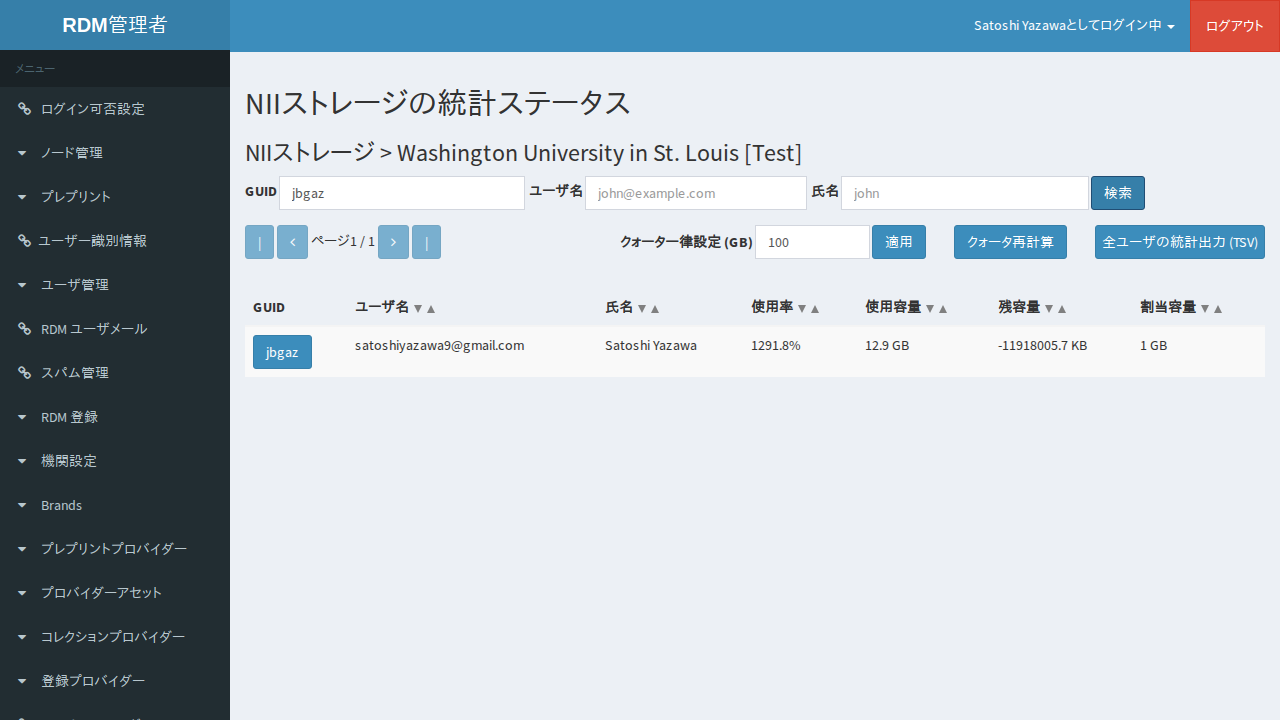

In [22]:
async def _step(page):
    await page.locator('#id_guid').fill(quota_user_id)
    await page.locator('//button[@type = "submit" and text() = "検索"]').click()

    await expect(page.locator(f'//a[contains(text(), "{quota_user_id}")]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## GUID「(指定されたユーザーID)」を押下する。

該当のユーザーのページに移動する

Start epoch: 1745213916.6048656 seconds


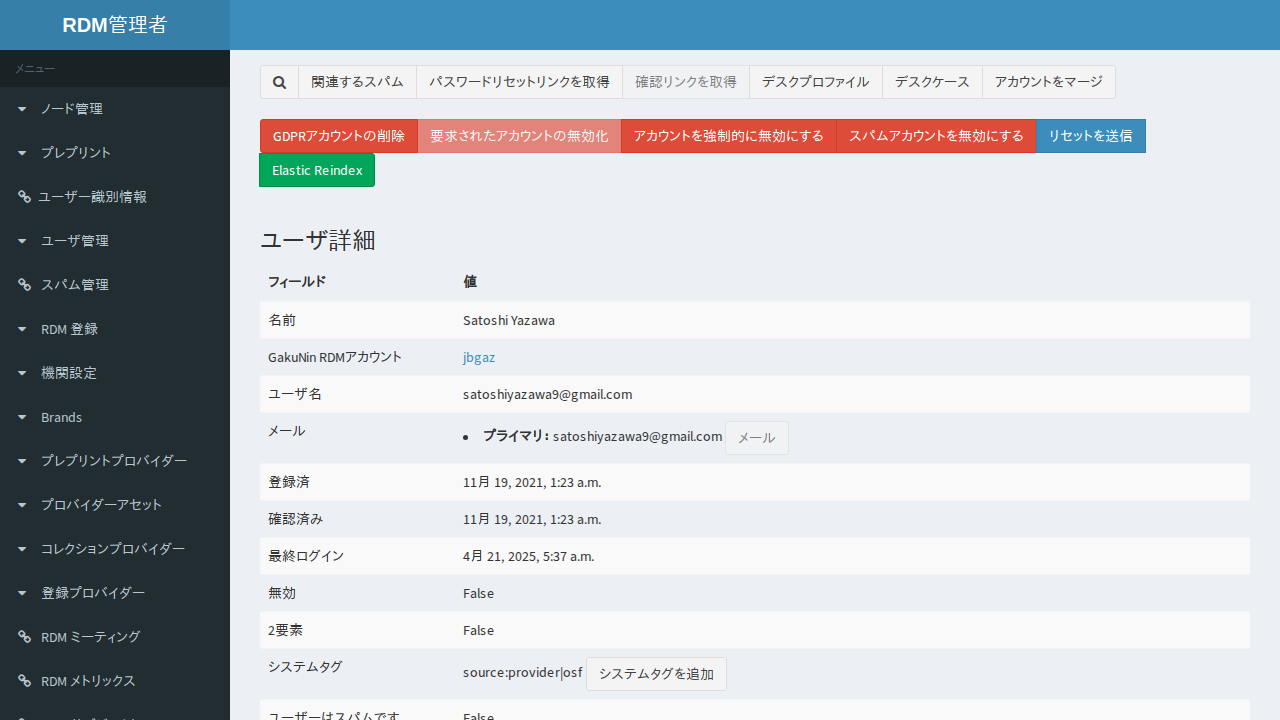

In [23]:
async def _step(page):
    await page.locator(f'//a[contains(text(), "{quota_user_id}")]').click()

    await expect(page.locator('//td[contains(text(), "NIIストレージの割当て")]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## 「NIIストレージの割当て」を"1"にし「適用」を押下する

該当のユーザの「NIIストレージの割当て」が1GBになる

Start epoch: 1745213917.146539 seconds


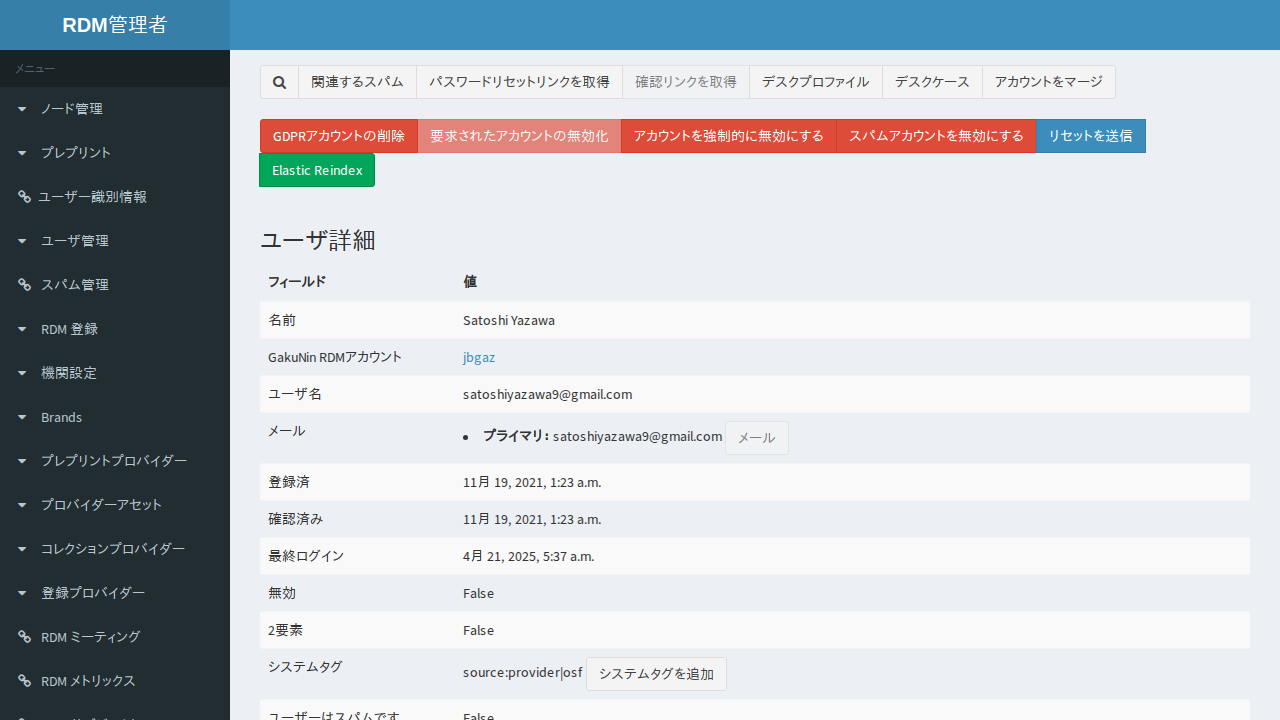

In [24]:
async def _step(page):
    await page.locator('#storageLimit').fill("1")
    await page.locator('#applyMaxQuota').click()

    await expect(page.locator('#storageLimit')).to_have_value('1', timeout=transition_timeout)

await run_pw(_step)

## GakuNin RDMのページに移動する

GakuNin RDMのTOPページが開かれる

In [25]:
# rdm_url = 'https://bh.rdm.yzwlab.com/'

# from datetime import datetime

# yyyymmdd = datetime.now().strftime('%Y%m%d')
# quota_project_name = f'管理者クォータテスト {yyyymmdd}'

Start epoch: 1745213917.8317137 seconds


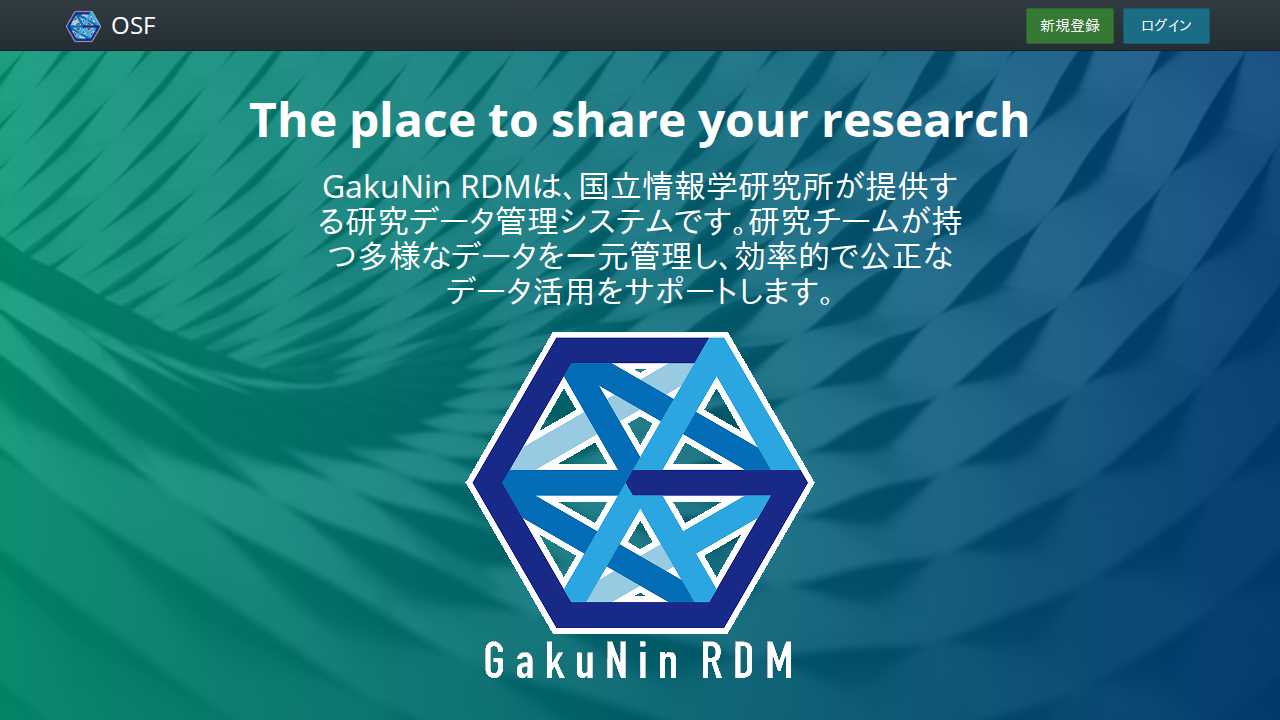

In [26]:
import time

async def _step(page):
    await page.goto(rdm_url)

    # 同意する ボタンが現れるまで待つ
    await expect(page.locator('//button[text() = "同意する"]')).to_be_visible(timeout=transition_timeout)

    # 同意する をクリック
    await page.locator('//button[text() = "同意する"]').click()

    # 同意する が表示されなくなったことを確認
    await expect(page.locator('//button[text() = "同意する"]')).to_have_count(0, timeout=500)

await run_pw(_step)

## ログイン情報を用いてGakuNin RDMにログインする

(IdPに関するログイン情報が与えられた場合、)
GakuNin Embeded DSのプルダウンを展開し、IdPリストから指定されたIdPを選択する。その後、アカウントのID/Passwordを入力して「Login」ボタンを押下する。

(IdPが指定されていない場合、)
CASのログイン操作を実施する。

Start epoch: 1745213919.8189824 seconds


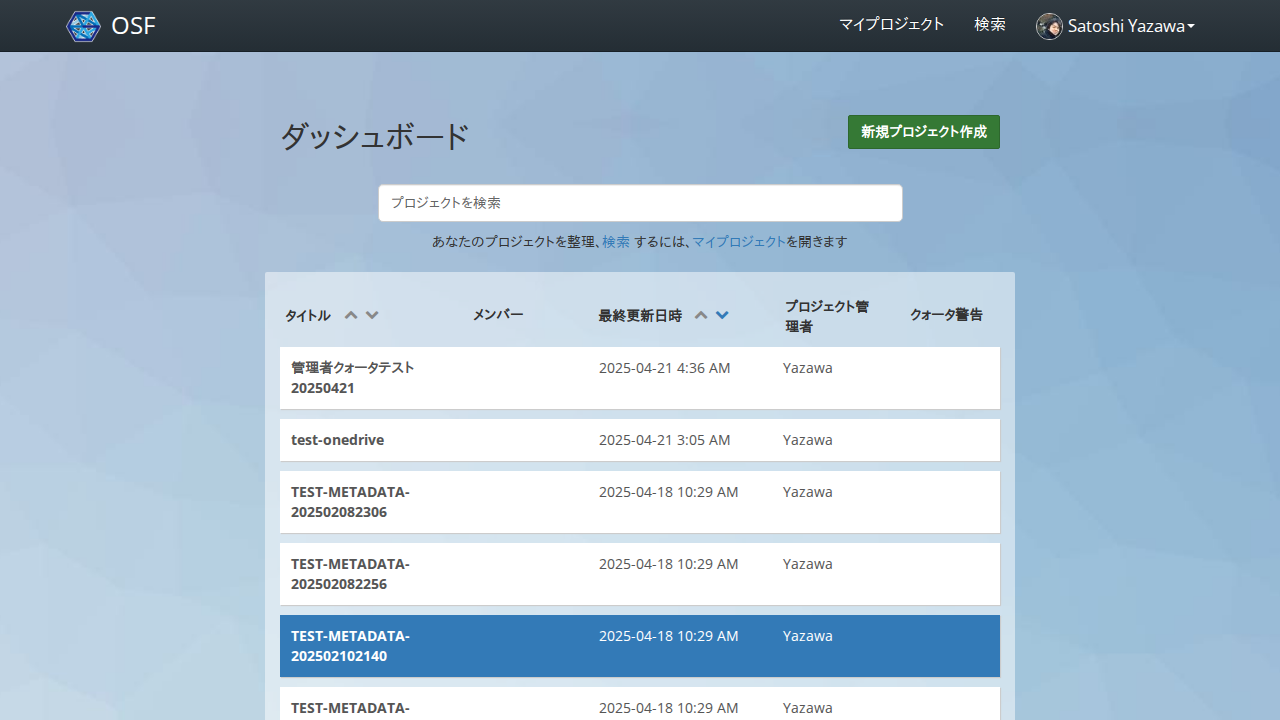

In [27]:
import scripts.grdm
importlib.reload(scripts.grdm)

async def _step(page):
    await scripts.grdm.login(
        page, idp_name_1, idp_username_1, idp_password_1, transition_timeout=transition_timeout
    )

    await scripts.grdm.expect_dashboard(page, transition_timeout=transition_timeout)

await run_pw(_step)

## プロジェクト一覧に指定されたタイトルのプロジェクトがあればそのプロジェクトを開き、ない場合は指定された名前のプロジェクトを作成する


Start epoch: 1745213923.937867 seconds


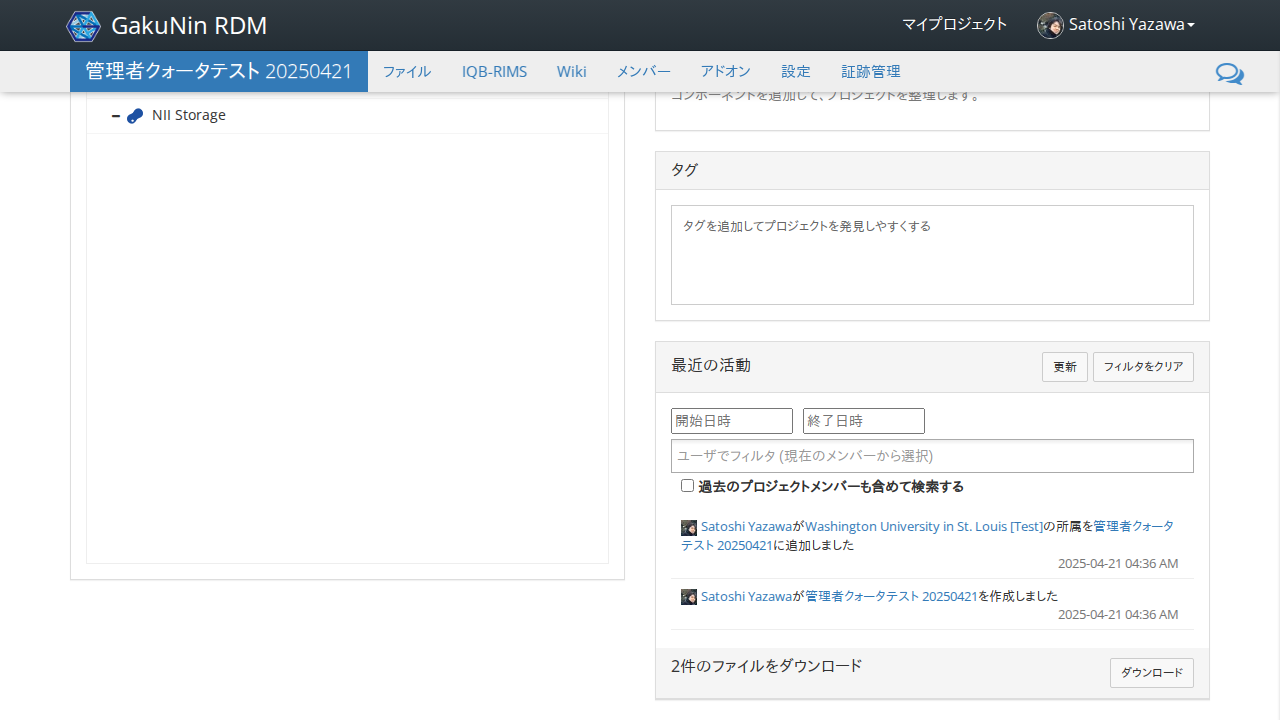

In [28]:
# import scripts.grdm
# importlib.reload(scripts.grdm)

target_storage_name = 'NII Storage'

async def _step(page):
    await expect(page.locator('//*[@data-test-create-project-modal-button]')).to_have_count(1)

    await scripts.grdm.ensure_project_exists(page, quota_project_name, transition_timeout=transition_timeout)
    await page.locator(f'//*[@data-test-dashboard-item-title and text()="{quota_project_name}"]').click()        

    await expect(page.locator('//a[text() = "アドオン"]')).to_be_visible(timeout=transition_timeout)
    await expect(grdm.get_select_expanded_storage_title_locator(page, target_storage_name)).to_be_visible(timeout=transition_timeout)
    time.sleep(1)

    await page.locator('//h3[text()="最近の活動"]').click()

await run_pw(_step)

## ファイル一覧の対象ストレージにファイル(1GB)をアップロードする

ファイルを追加できないことを確認する

1024+0 records in
1024+0 records out
1073741824 bytes (1.1 GB, 1.0 GiB) copied, 0.997163 s, 1.1 GB/s
-rw-r--r-- 1 jovyan users 1073741824 Apr 21 05:38 /tmp/tmpkfs27sdm/20250421_アップロードテスト_1GB.dat
Start epoch: 1745213929.642537 seconds


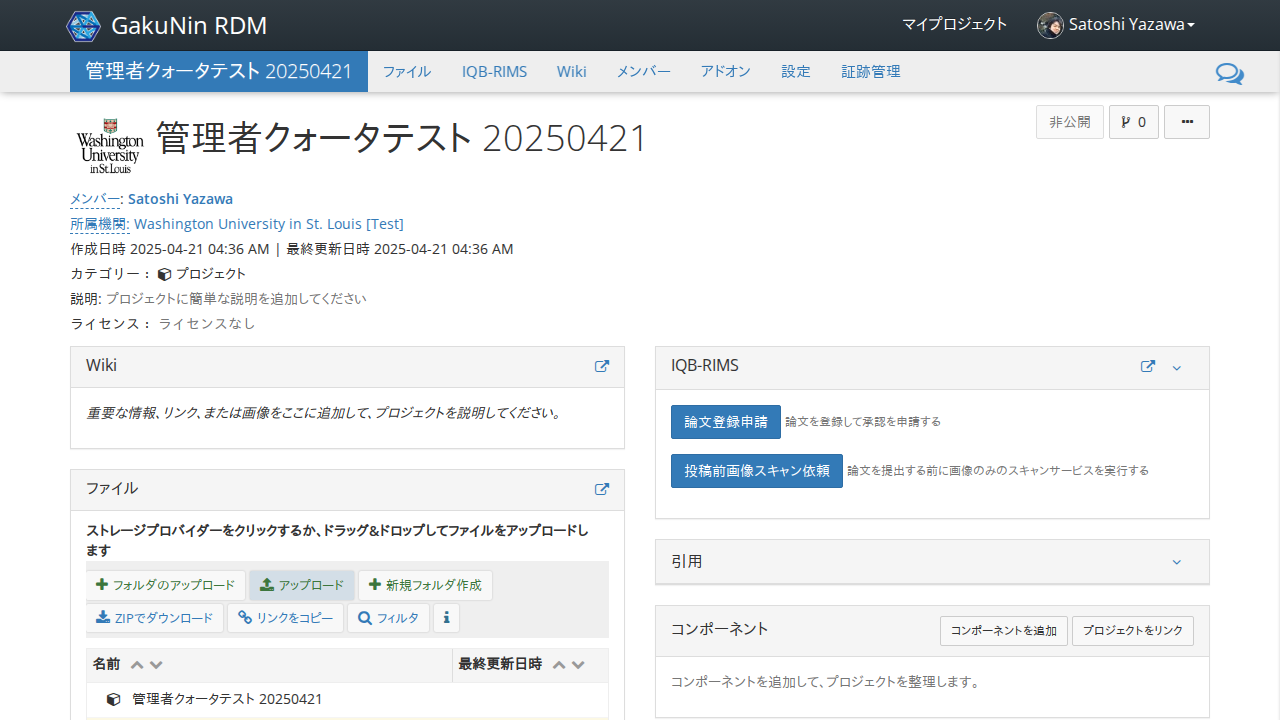

In [29]:
import asyncio
import traceback
from datetime import datetime

# ファイルの作成
filename = f'{yyyymmdd}_アップロードテスト_1GB.dat'
filepath = os.path.join(work_dir, filename)

!dd if=/dev/zero of={filepath} bs=1M count=1024
!ls -la {filepath}

async def _step(page):
    await grdm.get_select_storage_title_locator(page, target_storage_name).click()
    await page.locator('//h3[text()="最近の活動"]').click()
    await grdm.upload_file(page, filepath)
    await expect(page.locator('//*[contains(text(), "ファイルをアップロードするのに十分な")]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## 機関管理者ページに移動し、「NIIストレージの割当て」を"100"にし「適用」を押下する

該当のユーザの「機関ストレージの割り当て」が100になる

Start epoch: 1745213973.1342 seconds


Traceback (most recent call last):
  File "/tmp/ipykernel_68/414964137.py", line 14, in _step
    await expect(link).to_be_visible()
  File "/opt/conda/lib/python3.12/site-packages/playwright/async_api/_generated.py", line 20085, in to_be_visible
    await self._impl_obj.to_be_visible(visible=visible, timeout=timeout)
  File "/opt/conda/lib/python3.12/site-packages/playwright/_impl/_assertions.py", line 677, in to_be_visible
    await self._expect_impl(
  File "/opt/conda/lib/python3.12/site-packages/playwright/_impl/_assertions.py", line 74, in _expect_impl
    raise AssertionError(
AssertionError: Locator expected to be visible
Actual value: <element(s) not found> 
Call log:
  - LocatorAssertions.to_be_visible with timeout 5000ms
  -   - waiting for locator("//a[text() = \"Washington University in St. Louis [Test]\"]")



Search next page...


Traceback (most recent call last):
  File "/tmp/ipykernel_68/414964137.py", line 14, in _step
    await expect(link).to_be_visible()
  File "/opt/conda/lib/python3.12/site-packages/playwright/async_api/_generated.py", line 20085, in to_be_visible
    await self._impl_obj.to_be_visible(visible=visible, timeout=timeout)
  File "/opt/conda/lib/python3.12/site-packages/playwright/_impl/_assertions.py", line 677, in to_be_visible
    await self._expect_impl(
  File "/opt/conda/lib/python3.12/site-packages/playwright/_impl/_assertions.py", line 74, in _expect_impl
    raise AssertionError(
AssertionError: Locator expected to be visible
Actual value: <element(s) not found> 
Call log:
  - LocatorAssertions.to_be_visible with timeout 5000ms
  -   - waiting for locator("//a[text() = \"Washington University in St. Louis [Test]\"]")



Search next page...


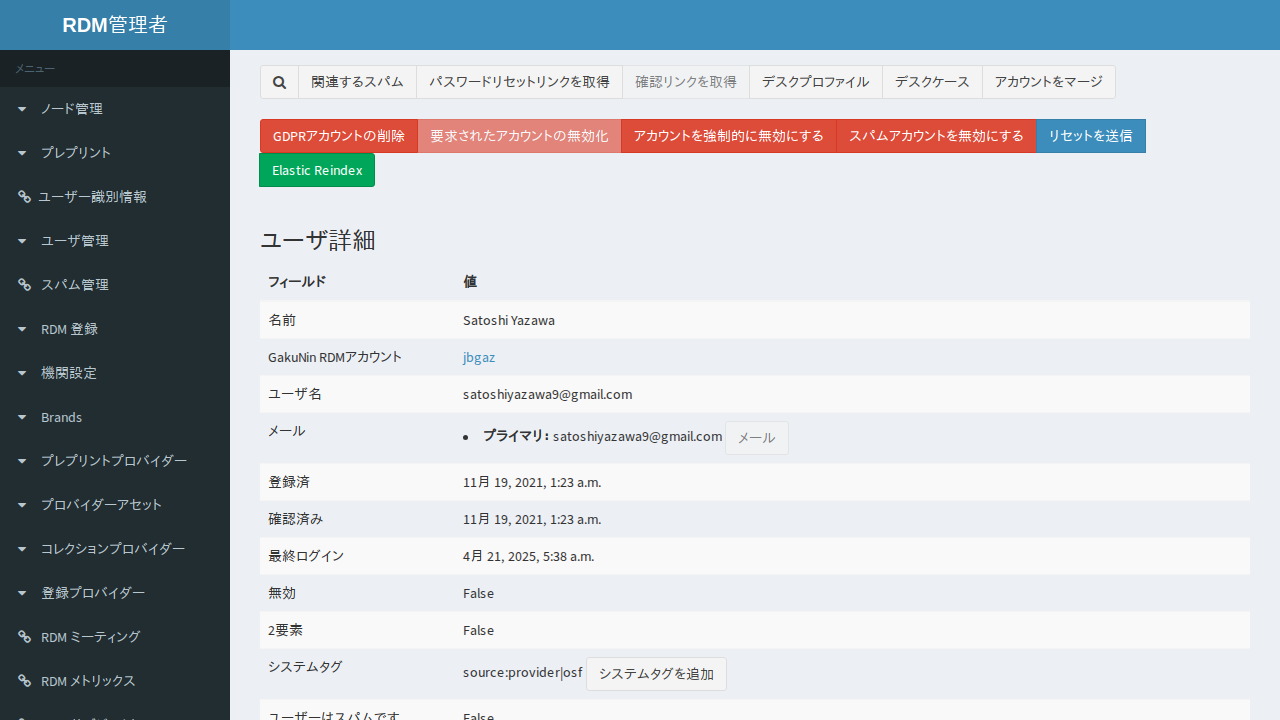

In [31]:
project_url = None

async def _step(page):
    global project_url
    project_url = page.url
    
    await page.goto(admin_rdm_url)
    await page.locator('//a[@href = "/institutions/institution_list/"]').click()

    await expect(page.locator('//h2[text() = "NIIストレージ使用の機関のリスト"]')).to_be_visible(timeout=transition_timeout)
    while True:
        link = page.locator(f'//a[text() = "{target_organization}"]')
        try:
            await expect(link).to_be_visible()
        except:
            traceback.print_exc()
            print('Search next page...')
            # 次のページかもしれない
            await page.locator('//a[i[contains(@class, "fa-angle-right")]]').click()
            await expect(page.locator('//h2[text() = "NIIストレージ使用の機関のリスト"]')).to_be_visible(timeout=transition_timeout)
            continue
        await link.click()
        break

    await expect(page.locator('//h2[contains(text(), "NIIストレージの統計ステータス")]')).to_be_visible(timeout=transition_timeout)
    await page.locator('#id_guid').fill(quota_user_id)
    await page.locator('//button[@type = "submit" and text() = "検索"]').click()

    await expect(page.locator(f'//a[contains(text(), "{quota_user_id}")]')).to_be_visible(timeout=transition_timeout)
    await page.locator(f'//a[contains(text(), "{quota_user_id}")]').click()

    await expect(page.locator('//td[contains(text(), "NIIストレージの割当て")]')).to_be_visible(timeout=transition_timeout)
    await page.locator('#storageLimit').fill("100")
    await page.locator('#applyMaxQuota').click()

    await expect(page.locator('#storageLimit')).to_have_value('100', timeout=transition_timeout)

await run_pw(_step)

## GakuNin RDMのページに移動する

Start epoch: 1745213986.007258 seconds


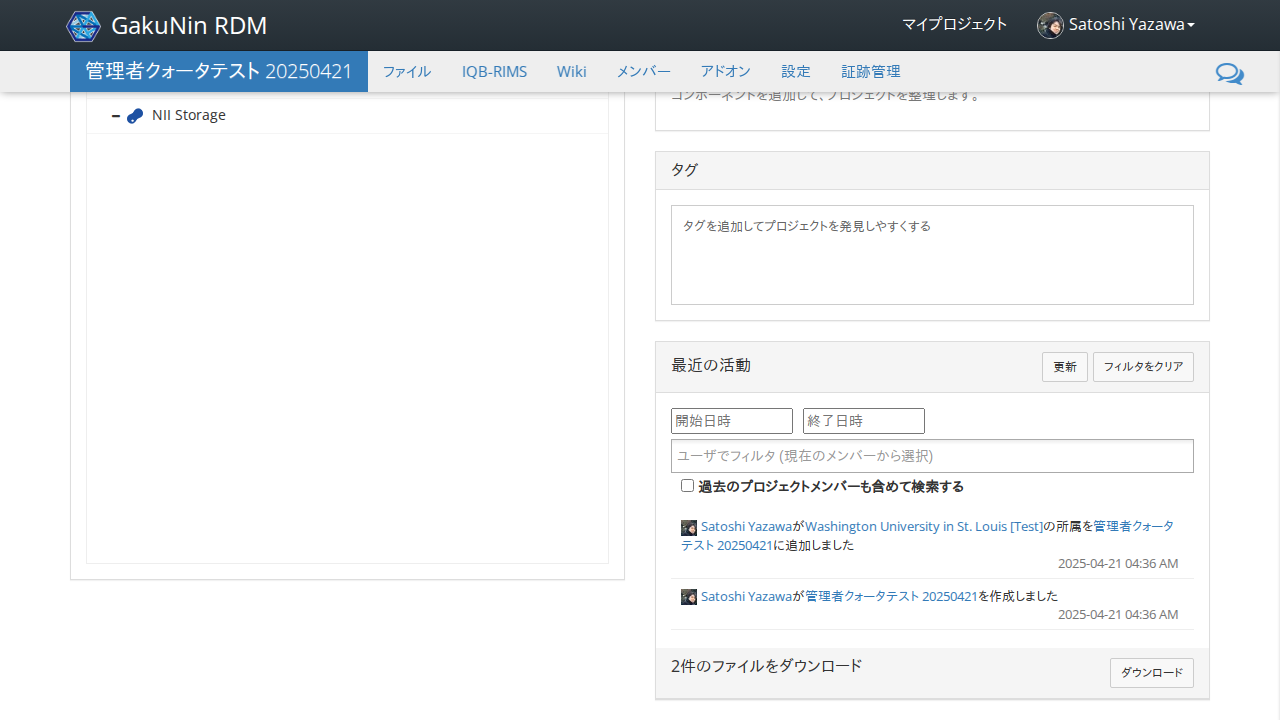

In [32]:
async def _step(page):
    await page.goto(project_url)
    await expect(page.locator('//a[text() = "アドオン"]')).to_be_visible(timeout=transition_timeout)
    await expect(grdm.get_select_expanded_storage_title_locator(page, target_storage_name)).to_be_visible(timeout=transition_timeout)
    time.sleep(1)

    await page.locator('//h3[text()="最近の活動"]').click()

await run_pw(_step)

## ファイル一覧の対象ストレージにファイル(1GB)をアップロードする

ファイルを追加できることを確認する。

Start epoch: 1745214032.9988325 seconds


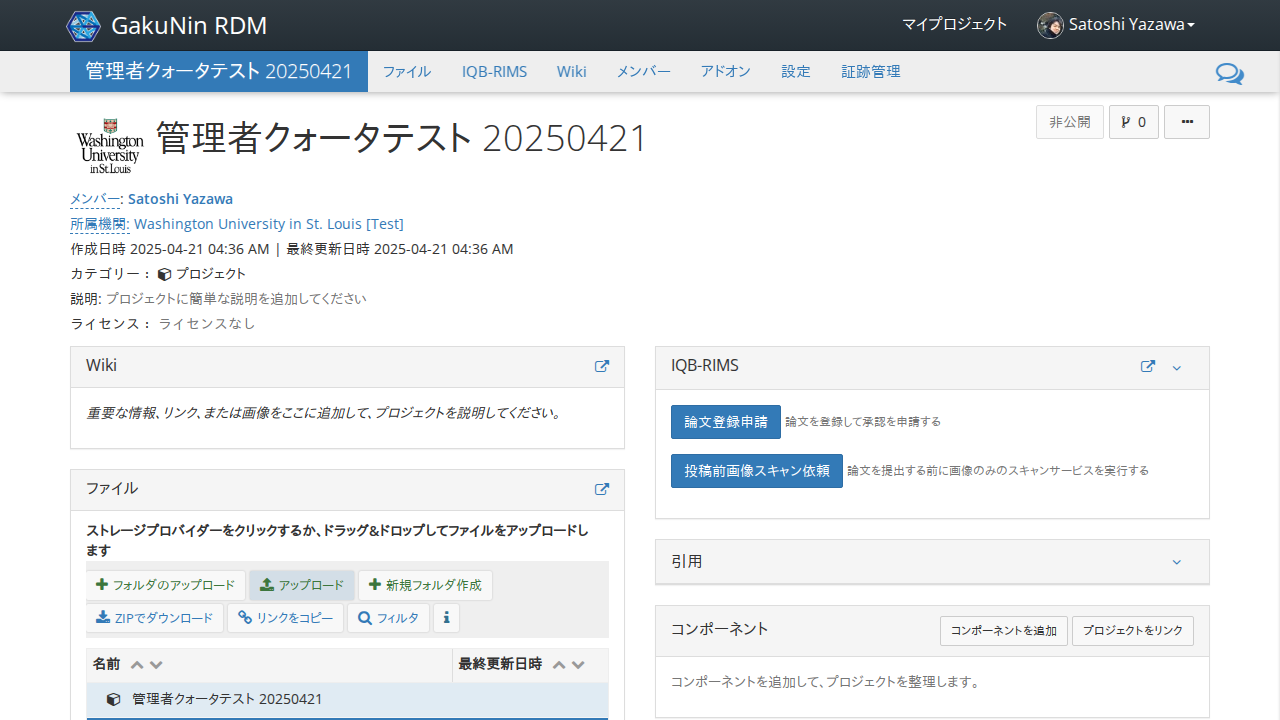

In [33]:
async def _step(page):
    await grdm.get_select_storage_title_locator(page, target_storage_name).click()
    await grdm.upload_file(page, filepath)
    await expect(page.locator(f'//*[text() = "{filename}"]/../following-sibling::*//*[@role = "progressbar"]')).to_have_count(1, timeout=transition_timeout)

    await expect(page.locator(f'//*[text() = "{filename}"]/../following-sibling::*//*[@role = "progressbar"]')).to_have_count(0, timeout=transition_timeout * 25)
    await expect(grdm.get_select_file_title_locator(page, filename)).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## プロジェクトを削除する

Start epoch: 1745214262.8846574 seconds
Somerville


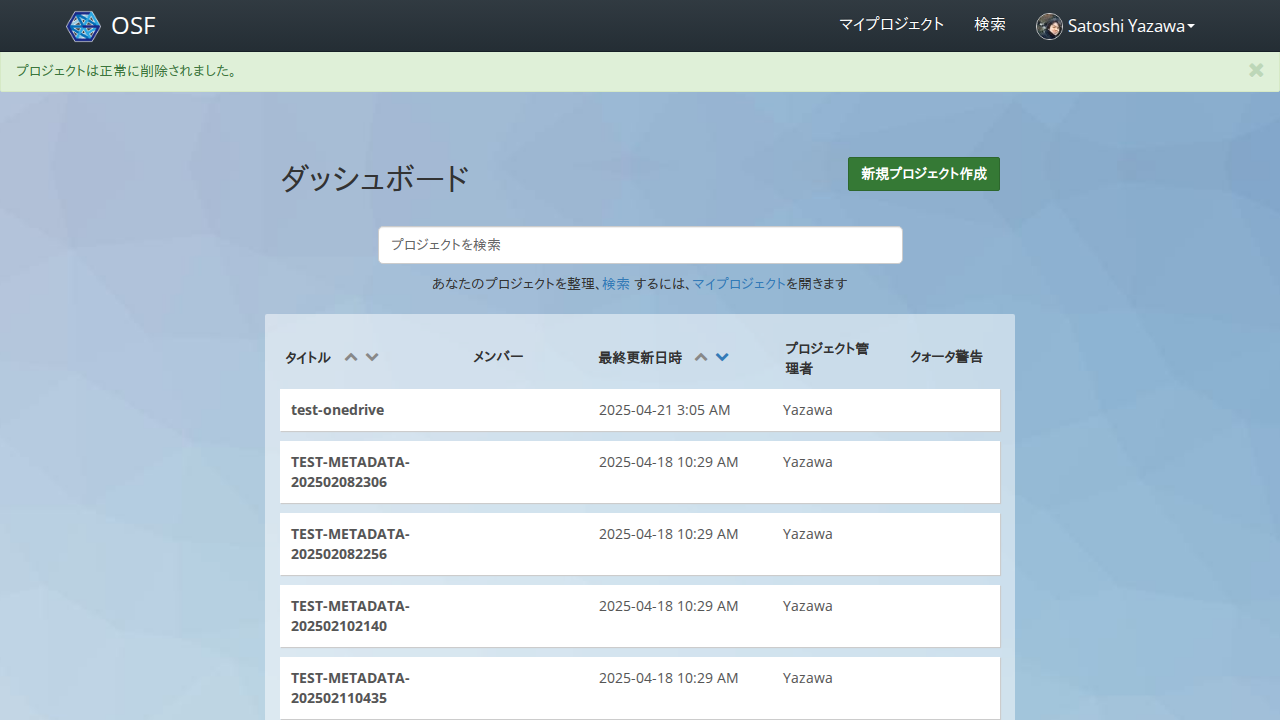

In [34]:
async def _step(page):
    await scripts.grdm.delete_project(page)

    await scripts.grdm.expect_dashboard(page, transition_timeout=transition_timeout)

await run_pw(_step)

終了処理を実施。

In [35]:
await finish_pw_context()

Video: /tmp/tmpkfs27sdm/video-1.webm
HAR: /tmp/tmpkfs27sdm/har.zip


In [36]:
!rm -fr {work_dir}